In [12]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series, read_csv
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (10, 6)

from pathlib import Path
import sqlite3

In [13]:
data_dir = Path.cwd().parent / 'data'

conn = sqlite3.connect(data_dir / 'valorant.sqlite')

match_query = """
    SELECT *
    FROM matches
"""

df_matches = pd.read_sql(match_query, conn)
df_matches.head()

,MatchID,Date,Patch,EventID,EventName,EventStage,Team1ID,Team2ID,Team1,Team2,Team1_MapScore,Team2_MapScore
0,62393,2022-01-08 15:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (A),6903,6020,Booster Seat Gaming,Pho Real,2,1
1,62403,2022-01-08 15:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Decider (C),7046,7047,Bjor's Kittens,Mugiwara,2,0
2,62391,2022-01-08 12:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Winner's (A),6461,6903,Akrew,Booster Seat Gaming,2,1
3,62396,2022-01-08 12:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Winner's (B),6164,7043,Radiance,sameROFLMAO,2,0
4,62401,2022-01-08 12:30:00,Patch 3.12,826,Nerd Street Gamers Winter Championship - Regio...,Group Stage: Winner's (C),7045,7046,Salt and Vinegar,Bjor's Kittens,2,0


In [3]:
df = pd.read_sql("""
    SELECT *
    FROM game_rounds
""", conn, )

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15531 entries, 0 to 15530
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GameID        15531 non-null  object
 1   Team1ID       15531 non-null  int64 
 2   Team2ID       15531 non-null  int64 
 3   RoundHistory  14854 non-null  object
dtypes: int64(2), object(2)
memory usage: 485.5+ KB


In [9]:
df.head()

,GameID,Team1ID,Team2ID,RoundHistory
0,60894,6903,6020,"{1: {'RoundWinner': 'BOOS', 'ScoreAfterRound':..."
1,60895,6903,6020,"{1: {'RoundWinner': 'PHO ', 'ScoreAfterRound':..."
2,60896,6903,6020,"{1: {'RoundWinner': 'PHO ', 'ScoreAfterRound':..."
3,60924,7046,7047,"{1: {'RoundWinner': 'BJOR', 'ScoreAfterRound':..."
4,60925,7046,7047,"{1: {'RoundWinner': 'BJOR', 'ScoreAfterRound':..."


In [11]:
rhist_dict = df.loc[0]['RoundHistory']

In [14]:
print(rhist_dict)

{1: {'RoundWinner': 'BOOS', 'ScoreAfterRound': '1-0', 'WinType': 'elim', 'Team1Bank': 300.0, 'Team2Bank': 100.0, 'Team1BuyType': 'eco', 'Team2BuyType': 'eco'}, 2: {'RoundWinner': 'BOOS', 'ScoreAfterRound': '2-0', 'WinType': 'elim', 'Team1Bank': 2700.0, 'Team2Bank': 8600.0, 'Team1BuyType': 'semi-buy', 'Team2BuyType': 'eco'}, 3: {'RoundWinner': 'BOOS', 'ScoreAfterRound': '3-0', 'WinType': 'elim', 'Team1Bank': 12300.0, 'Team2Bank': 400.0, 'Team1BuyType': 'semi-buy', 'Team2BuyType': 'full-buy'}, 4: {'RoundWinner': 'BOOS', 'ScoreAfterRound': '4-0', 'WinType': 'elim', 'Team1Bank': 23600.0, 'Team2Bank': 9800.0, 'Team1BuyType': 'full-buy', 'Team2BuyType': 'semi-eco'}, 5: {'RoundWinner': 'PHO ', 'ScoreAfterRound': '4-1', 'WinType': 'boom', 'Team1Bank': 24200.0, 'Team2Bank': 3300.0, 'Team1BuyType': 'full-buy', 'Team2BuyType': 'full-buy'}, 6: {'RoundWinner': 'PHO ', 'ScoreAfterRound': '4-2', 'WinType': 'boom', 'Team1Bank': 10200.0, 'Team2Bank': 10300.0, 'Team1BuyType': 'full-buy', 'Team2BuyType':

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15531 entries, 0 to 15530
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GameID        15531 non-null  object
 1   Team1ID       15531 non-null  int64 
 2   Team2ID       15531 non-null  int64 
 3   RoundHistory  14854 non-null  object
dtypes: int64(2), object(2)
memory usage: 485.5+ KB


The game_rounds table has JSON strings for the round history. However, it doesn't appear to be in proper JSON format to use with json.loads. 

Steps so far:
1) Create database connection object with sqlite3
2) Create the query to use on the database
3) Use query and connection to create a dataframe from the resulting table

NEEDS:
A) Convert round history into a dictionary

In [4]:
df = pd.read_sql("""
    SELECT *
    FROM game_rounds
""", conn, )

df['RoundHistory'].head()

0    {1: {'RoundWinner': 'BOOS', 'ScoreAfterRound':...
1    {1: {'RoundWinner': 'PHO ', 'ScoreAfterRound':...
2    {1: {'RoundWinner': 'PHO ', 'ScoreAfterRound':...
3    {1: {'RoundWinner': 'BJOR', 'ScoreAfterRound':...
4    {1: {'RoundWinner': 'BJOR', 'ScoreAfterRound':...
Name: RoundHistory, dtype: object

In [5]:
# These are the steps needed to get the json strings in the proper format
import re
pat = re.compile('(?P<round>\d+):')
repl = lambda x : f'"{x.group("round")}":'
quotes = lambda x : f'"{x.group("field")}":'
values = lambda x : f'"{x.group("value")}"'

df['RoundHistory'] = df.RoundHistory.str.replace("'(?P<field>\S+)':", quotes, regex=True).str.replace("'(?P<value>[^,]+)'", values, regex=True).str.replace(pat, repl, regex=True)

In [43]:
query = """
    SELECT EventName, Date, games.Team1, games.Team2, Winner, RoundHistory
    FROM game_rounds
    JOIN games USING (GameID)
    JOIN matches USING (MatchID)
"""
df = pd.read_sql(query, conn)

In [44]:
df.head()

,EventName,Date,Team1,Team2,Winner,RoundHistory
0,Nerd Street Gamers Winter Championship - Regio...,2022-01-08 15:30:00,Booster Seat Gaming,Pho Real,Booster Seat Gaming,"{1: {'RoundWinner': 'BOOS', 'ScoreAfterRound':..."
1,Nerd Street Gamers Winter Championship - Regio...,2022-01-08 15:30:00,Booster Seat Gaming,Pho Real,Pho Real,"{1: {'RoundWinner': 'PHO ', 'ScoreAfterRound':..."
2,Nerd Street Gamers Winter Championship - Regio...,2022-01-08 15:30:00,Booster Seat Gaming,Pho Real,Booster Seat Gaming,"{1: {'RoundWinner': 'PHO ', 'ScoreAfterRound':..."
3,Nerd Street Gamers Winter Championship - Regio...,2022-01-08 15:30:00,Bjor's Kittens,Mugiwara,Bjor's Kittens,"{1: {'RoundWinner': 'BJOR', 'ScoreAfterRound':..."
4,Nerd Street Gamers Winter Championship - Regio...,2022-01-08 15:30:00,Bjor's Kittens,Mugiwara,Bjor's Kittens,"{1: {'RoundWinner': 'BJOR', 'ScoreAfterRound':..."


In [45]:
df = df.dropna(axis='index', subset=['RoundHistory'])

repl_dict = {"(\d+):" : r'"\1":',
             "'(\S+)':" : r'"\1":',
             "'([^,]+)'" : r'"\1"'}

df['RoundHistory'] = df.RoundHistory.replace(regex=repl_dict)
df.RoundHistory        

0        {"1": {"RoundWinner": "BOOS", "ScoreAfterRound...
1        {"1": {"RoundWinner": "PHO ", "ScoreAfterRound...
2        {"1": {"RoundWinner": "PHO ", "ScoreAfterRound...
3        {"1": {"RoundWinner": "BJOR", "ScoreAfterRound...
4        {"1": {"RoundWinner": "BJOR", "ScoreAfterRound...
                               ...                        
14965    {"1": {"RoundWinner": "BBL", "ScoreAfterRound"...
14966    {"1": {"RoundWinner": "RIXGG", "ScoreAfterRoun...
14967    {"1": {"RoundWinner": "PP", "ScoreAfterRound":...
14970    {"1": {"RoundWinner": "CLWNS", "ScoreAfterRoun...
14972    {"1": {"RoundWinner": "IB", "ScoreAfterRound":...
Name: RoundHistory, Length: 14854, dtype: object

In [35]:
records = df.to_dict(orient='records')
import json
for game in records:
    try:
        game['RoundHistory'] = json.loads(game['RoundHistory'])
    except json.JSONDecodeError as err:
        print(f'{err.pos}')
        print(f'{err.doc}')
        print(f'{err.msg}')
        break

In [52]:
cols = ['EventName', 'Date', 'Team1', 'Team2', 'Winner', 'RoundHistory_12_ScoreAfterRound']
df_half = pd.json_normalize(records, max_level=2, sep='_')[cols]

In [54]:
df_half = df_half.rename(columns={'RoundHistory_12_ScoreAfterRound' : 'Half_Score'})
df_half.sample(10)

,EventName,Date,Team1,Team2,Winner,Half_Score
12035,Charge Gaming Cup #2,2020-12-12 09:20:00,VISU Gaming,eSuba,VISU Gaming,9-3
9329,Champions Tour Philippines Stage 1: Challengers 3,2021-03-06 03:00:00,The First Order,Oasis Gaming,The First Order,9-3
12719,First Strike: Korea,2020-11-20 03:00:00,Cloud9 Korea,Lunatic-Hai,Cloud9 Korea,11-1
7638,Champions Tour North America Stage 2: Challeng...,2021-04-22 17:00:00,Immortals,TSM,Immortals,7-5
14266,EPULZE Royal SEA Cup,2020-09-25 12:00:00,Bren Esports,ex-Morph Team,Bren Esports,8-4
13926,Valorant Challenge 2,2020-10-15 11:00:00,Oxygen Esports,nolpenki,Oxygen Esports,7-5
11315,Nerd Street Gamers Winter Championship,2021-01-14 16:50:00,Equinox Esports,Ghost Gaming,Equinox Esports,9-3
10454,Champions Tour Malaysia & Singapore Stage 1: C...,2021-02-07 00:20:00,Reality Rift,Team SMG,Team SMG,5-7
1385,Valorant Elite Showdown,2021-11-11 21:15:00,DarkZero Esports,FLICKBAITERS,DarkZero Esports,6-6
9126,Champions Tour Brazil Stage 1: Masters,2021-03-13 17:00:00,Gamelanders Blue,SLICK,Gamelanders Blue,6-6


In [63]:
df_half = df_half.dropna()
df_half.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14852 entries, 0 to 14853
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   EventName   14852 non-null  object
 1   Date        14852 non-null  object
 2   Team1       14852 non-null  object
 3   Team2       14852 non-null  object
 4   Winner      14852 non-null  object
 5   Half_Score  14852 non-null  object
dtypes: object(6)
memory usage: 812.2+ KB


In [64]:
team1Wins = ['12-0', '11-1', '10-2', '9-3', '8-4', '7-5']
df_half['Half_Winner'] = df_half.Team1.where(df_half['Half_Score'].isin(team1Wins), df_half.Team2)
df_half.sample(10)

,EventName,Date,Team1,Team2,Winner,Half_Score,Half_Winner
1633,Red Bull Home Ground #2,2021-11-05 13:45:00,Acend,Gambit Esports,Acend,5-7,Gambit Esports
5176,Nerd Street Gamers Summer Championship - Open 10,2021-07-06 21:35:19,YFP Gaming,DarkZero Esports,YFP Gaming,9-3,YFP Gaming
6288,Knights Monthly Gauntlet: June,2021-06-13 17:00:00,Soniqs,Teal Seam,Soniqs,10-2,Soniqs
1426,Valorant Elite Showdown,2021-11-11 18:00:00,Immortals,GunsForHire,Immortals,5-7,GunsForHire
2893,BoomTV Proving Grounds - Finals,2021-09-11 18:55:00,Squirtle Squad,Renegades,Squirtle Squad,9-3,Squirtle Squad
13778,Legion Defiance Cup,2020-10-21 15:00:00,Movistar Riders,B7 Warriors,Movistar Riders,10-2,Movistar Riders
10063,Champions Tour Europe Stage 1: Challengers 2,2021-02-17 14:30:00,G2 Esports,Inside Games,G2 Esports,10-2,G2 Esports
14784,Clan Masters,2020-08-19 05:00:00,DRX Vision Strikers,No Mercy,DRX Vision Strikers,10-2,DRX Vision Strikers
3629,Champions Tour SEA Stage 3: Challengers Playoffs,2021-08-12 23:00:00,Bren Esports,CBT Gaming,Bren Esports,8-4,Bren Esports
8916,Oceania Tour: Stage 01,2021-03-21 01:15:00,ORDER,Mindfreak,Mindfreak,6-6,Mindfreak


In [65]:
df_half['Comeback_Win'] = (df_half.Half_Winner != df_half.Winner)
df_half.sample(10)

,EventName,Date,Team1,Team2,Winner,Half_Score,Half_Winner,Comeback_Win
3802,Kingdom Calling #3,2021-08-07 14:30:00,BIG,IVY,BIG,5-7,IVY,True
7548,Champions Tour Vietnam Stage 2: Challengers,2021-04-24 03:00:00,CERBERUS Esports,YAMAGAN,CERBERUS Esports,8-4,CERBERUS Esports,False
2684,K&H Magyar Nemzeti E-sport Bajnokság #3,2021-09-26 11:00:00,WiLD MultiGaming,iPon Esport,iPon Esport,6-6,iPon Esport,False
13666,NGL Open Cup,2020-10-25 14:00:00,ex-Giants Gaming,Totem Providence,ex-Giants Gaming,12-0,ex-Giants Gaming,False
9618,VERSUS LEGENDS II,2021-02-27 07:00:00,HSDIRR,Souldazz,HSDIRR,8-4,HSDIRR,False
3111,Rix.GG Open August,2021-08-29 10:20:00,Reject$,123TAP,123TAP,4-8,123TAP,False
2485,LVP Rising Series #4,2021-09-30 11:00:00,TENSTAR,WATEr,TENSTAR,10-2,TENSTAR,False
14117,Copa Rakin #2,2020-10-05 20:00:00,VIMDOLOL,Black Dragons,VIMDOLOL,5-7,Black Dragons,True
14788,Knights Invitational Gauntlet Series,2020-08-16 19:15:00,Gen.G,TSM,Gen.G,6-6,TSM,True
11880,SEA Fire Championship 2020,2020-12-18 06:00:00,Team SMG,Sneaker Daily Meloner,Team SMG,10-2,Team SMG,False


In [41]:
null_halfscore_index = half_scores[half_scores.isna()].index

In [42]:
null_halfscore_index

RangeIndex(start=0, stop=14854, step=1)

In [66]:
pure_df = pd.read_sql("""
    SELECT *
    FROM game_rounds
""", conn, )

pure_df.head()

,GameID,Team1ID,Team2ID,RoundHistory
0,60894,6903,6020,"{1: {'RoundWinner': 'BOOS', 'ScoreAfterRound':..."
1,60895,6903,6020,"{1: {'RoundWinner': 'PHO ', 'ScoreAfterRound':..."
2,60896,6903,6020,"{1: {'RoundWinner': 'PHO ', 'ScoreAfterRound':..."
3,60924,7046,7047,"{1: {'RoundWinner': 'BJOR', 'ScoreAfterRound':..."
4,60925,7046,7047,"{1: {'RoundWinner': 'BJOR', 'ScoreAfterRound':..."


In [72]:
score_categories = {'Half_Score': 'category'}
score_cat_order = ['6-6', '7-5', '8-4', '9-3', '10-2', '11-1', '12-0']
df_clean = pd.read_csv(data_dir / 'val_comebacks.csv', dtype=score_categories)
# use arg 'dtypes' in order to set the half_score column as a category data type
df_clean.head()
df_clean['Half_Score'] = df_clean.Half_Score.cat.reorder_categories(new_categories=score_cat_order)

In [69]:
df_clean.Half_Score.dtype

CategoricalDtype(categories=['10-2', '11-1', '12-0', '6-6', '7-5', '8-4', '9-3'], ordered=False)

In [94]:
df_categories = df_clean[df_clean.Half_Score != '6-6']
df_categories['Half_Score'] = df_categories.Half_Score.cat.remove_categories(['6-6'])
df_categories['Half_Score'].value_counts()

/tmp/ipykernel_62428/1180481249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categories['Half_Score'] = df_categories.Half_Score.cat.remove_categories(['6-6'])


7-5     3807
8-4     3368
9-3     2783
10-2    1867
11-1     888
12-0     250
Name: Half_Score, dtype: int64

In [111]:
columns = ['ratio']
df_comeback_ratio = pd.DataFrame(df_categories.groupby('Half_Score')[['Comeback_Win']].value_counts(normalize=True), columns=columns)
df_comeback_ratio = df_comeback_ratio.reset_index()
df_comeback_ratio

,Half_Score,Comeback_Win,ratio
0,7-5,False,0.677962
1,7-5,True,0.322038
2,8-4,False,0.822743
3,8-4,True,0.177257
4,9-3,False,0.914481
5,9-3,True,0.085519
6,10-2,False,0.971612
7,10-2,True,0.028388
8,11-1,False,0.996622
9,11-1,True,0.003378


In [92]:
# wins_by_scores['Comeback_Ratio'] = wins_by_scores['sum'] / wins_by_scores['count']
wins_by_scores.columns

MultiIndex([(  'Half_Score',      ''),
            ('Comeback_Win',   'sum'),
            ('Comeback_Win', 'count')],
           )

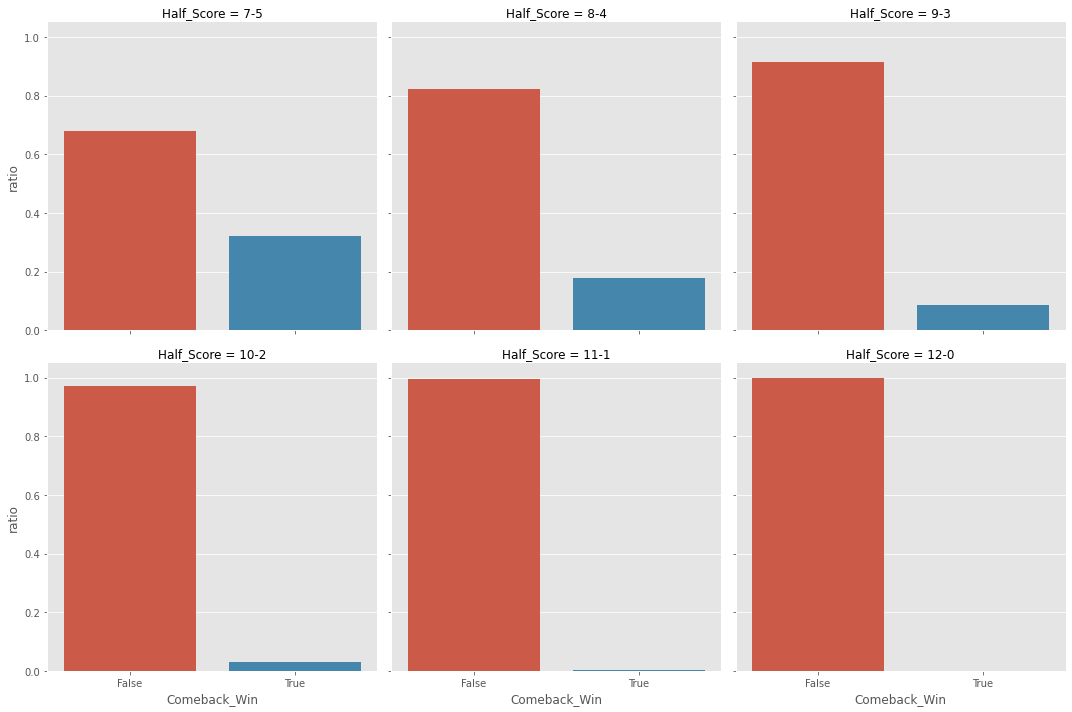

In [113]:
sns.catplot(x='Comeback_Win', y='ratio', col='Half_Score', col_wrap=3, data=df_comeback_ratio, kind='bar')
plt.show()